# Sprint18課題 公開されている実装を動かす

## 【問題1】学習と推定
Sprint16で読んだ[Faster R-CNN](https://arxiv.org/pdf/1506.01497.pdf)の実装を動かします。

以下のものを使用してください。Kerasを使用した実装です。

[duckrabbits/ObjectDetection at master](https://github.com/duckrabbits/ObjectDetection)

参照:
[lasershow/SimpsonRecognition](https://github.com/lasershow/SimpsonRecognition)


READMEを参考に上記実装を動かしてください。


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp ./drive/My\ Drive/ObjectDetection-master.zip .

In [4]:
!unzip /content/ObjectDetection-master.zip

Archive:  /content/ObjectDetection-master.zip
e16a97f702b5a52cf14925274601137fdc30c839
   creating: ObjectDetection-master/
  inflating: ObjectDetection-master/.gitignore  
  inflating: ObjectDetection-master/README.md  
  inflating: ObjectDetection-master/annotation.txt  
   creating: ObjectDetection-master/model/
  inflating: ObjectDetection-master/model/FixedBatchNormalization.py  
  inflating: ObjectDetection-master/model/RoiPoolingConv.py  
 extracting: ObjectDetection-master/model/__init__.py  
  inflating: ObjectDetection-master/model/config.py  
  inflating: ObjectDetection-master/model/data_augment.py  
  inflating: ObjectDetection-master/model/data_generators.py  
  inflating: ObjectDetection-master/model/faster_rcnn.py  
  inflating: ObjectDetection-master/model/losses.py  
  inflating: ObjectDetection-master/model/parser.py  
  inflating: ObjectDetection-master/model/resnet.py  
  inflating: ObjectDetection-master/model/roi_helpers.py  
  inflating: ObjectDetection-master/p

In [0]:
!cp ./drive/My\ Drive/kaggle.json .

In [0]:
!mkdir  /root/kaggle
!mv /root/kaggle /root/.kaggle

In [0]:
!mv kaggle.json /root/.kaggle

In [10]:
!kaggle datasets download -d alexattia/the-simpsons-characters-dataset --force

100% 1.06G/1.07G [00:09<00:00, 123MB/s]
100% 1.07G/1.07G [00:09<00:00, 117MB/s]


In [11]:
!unzip -n the-simpsons-characters-dataset.zip -d /content/ObjectDetection-master

Archive:  the-simpsons-characters-dataset.zip
  inflating: /content/ObjectDetection-master/number_pic_char.csv  
  inflating: /content/ObjectDetection-master/simpsons_dataset.tar.gz  
  inflating: /content/ObjectDetection-master/characters_illustration.png  
  inflating: /content/ObjectDetection-master/simpsons_dataset.zip  
  inflating: /content/ObjectDetection-master/kaggle_simpson_testset.zip  
  inflating: /content/ObjectDetection-master/weights.best.hdf5  


In [12]:
!unzip /content/ObjectDetection-master/simpsons_dataset.zip

Output hidden; open in https://colab.research.google.com to view.

In [89]:
%%writefile /content/ObjectDetection-master/model/parser.py
import cv2
import numpy as np
import random
import pprint

def get_data(input_path):
    all_imgs = {}
    classes_count = {}
    class_mapping = {}
    with open(input_path,'r') as f:
        print('Parsing annotation files')
        for line in f:
            line_split = line.strip().split(',')
            print(line_split)
            (filename,x1,y1,x2,y2,class_name) = line_split

            if class_name not in classes_count:
                classes_count[class_name] = 1
            else:
                classes_count[class_name] += 1

            if class_name not in class_mapping:
                class_mapping[class_name] = len(class_mapping)

            if filename not in all_imgs:
                all_imgs[filename] = {}
                img = cv2.imread(filename)

                (rows,cols) = img.shape[:2]
                all_imgs[filename]['filepath'] = filename
                all_imgs[filename]['width'] = cols
                all_imgs[filename]['height'] = rows
                all_imgs[filename]['bboxes'] = []
                if np.random.randint(0,6) > 0:
                    all_imgs[filename]['imageset'] = 'trainval'
                else:
                    all_imgs[filename]['imageset'] = 'test'

            all_imgs[filename]['bboxes'].append({'class': class_name, 'x1': int(x1), 'x2': int(x2), 'y1': int(y1), 'y2': int(y2)})

        all_data = []
        for key in all_imgs:
            all_data.append(all_imgs[key])

        classes_count['bg'] = 0
        class_mapping['bg'] = len(class_mapping)
        random.shuffle(all_data)
        print('Training images per class ({} classes) :'.format(len(classes_count)))
        pprint.pprint(classes_count)
        return all_data, classes_count, class_mapping

Overwriting /content/ObjectDetection-master/model/parser.py


In [14]:
%run /content/ObjectDetection-master/train.py -p /content/ObjectDetection-master/annotation.txt --n_epochs 10

Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20190722-012020_config.pickle
-------------------------------
Epoch 1/100
1000/1000 [==============================] - 316s 316ms/step - rpn_cls: 1.9330 - rpn_regr: 0.1324 - detector_cls: 2.6280 - detector_regr: 0.7784
Average number of overlapping bounding boxes from RPN = 20.807 for 1000 previous iterations
Mean number of bounding boxes from RPN overlapping ground truth boxes: 20.817182817182818
Classi

SystemExit: ignored

## 【問題2】論文と実装の対応
コードリーディングを行ってください。

まず、Faster R-CNN[1]において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

RPN<br>
faster_rcnn.pyの14行目でbaseのneural networkを定義し（resnet.pyのnn_base関数で画像から畳み込んだ特徴量を生成）、faster_rcnn.pyの18行目でその特徴量を活かしてclassification（物体のクラス分け）用とregression（物体認識）用の特徴量を作っている（resnet.pyのrpn関数でさらに畳み込み）

RoIプーリング<br>
RoiPoolingConv.pyの主に60行目以降


## 【問題3】学習済みの重みによる推定

シンプソンズのデータセットをFaster R-CNN以外の手法で学習・推定を行います。<br>
[YOLOv3](https://pjreddie.com/media/files/papers/YOLOv3.pdf)の[Keras実装](https://github.com/qqwweee/keras-yolo3)を使います。

学習済みの重みを使い推定を行う方法がREADME.mdのQuick Startに記載されています。

まずはこの通りにして各自何かしらの画像や動画に対して検出を行ってください。

出力結果を課題の一部として提出してください。

In [0]:
!cp ./drive/My\ Drive/keras-yolo3-master.zip .

In [16]:
!unzip /content/keras-yolo3-master.zip

Archive:  /content/keras-yolo3-master.zip
e6598d13c703029b2686bc2eb8d5c09badf42992
   creating: keras-yolo3-master/
  inflating: keras-yolo3-master/.gitignore  
  inflating: keras-yolo3-master/LICENSE  
  inflating: keras-yolo3-master/README.md  
  inflating: keras-yolo3-master/coco_annotation.py  
  inflating: keras-yolo3-master/convert.py  
  inflating: keras-yolo3-master/darknet53.cfg  
   creating: keras-yolo3-master/font/
  inflating: keras-yolo3-master/font/FiraMono-Medium.otf  
  inflating: keras-yolo3-master/font/SIL Open Font License.txt  
  inflating: keras-yolo3-master/kmeans.py  
   creating: keras-yolo3-master/model_data/
  inflating: keras-yolo3-master/model_data/coco_classes.txt  
  inflating: keras-yolo3-master/model_data/tiny_yolo_anchors.txt  
  inflating: keras-yolo3-master/model_data/voc_classes.txt  
  inflating: keras-yolo3-master/model_data/yolo_anchors.txt  
  inflating: keras-yolo3-master/train.py  
  inflating: keras-yolo3-master/train_bottleneck.py  
  inflat

In [18]:
!wget https://pjreddie.com/media/files/yolov3.weights
!mv /content/yolov3.weights /content/keras-yolo3-master

--2019-07-22 02:25:22--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights.1’

yolov3.weights.1    100%[===================>] 236.52M  63.4MB/s    in 4.0s    

2019-07-22 02:25:26 (59.9 MB/s) - ‘yolov3.weights.1’ saved [248007048/248007048]



In [22]:
%run /content/keras-yolo3-master/convert.py /content/keras-yolo3-master/yolov3.cfg /content/keras-yolo3-master/yolov3.weights /content/keras-yolo3-master/model_data/yolo.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)


W0722 02:28:01.014036 140250718459776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.



Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_3
Parsing section convolutional_12
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_13
conv2d bn leaky (3, 3, 128, 256)
Parsing section shortcut_4
Parsing section convolution

W0722 02:36:35.690080 140250718459776 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



Parsing section upsample_0
Parsing section route_1
Concatenating route layers: [<tf.Tensor 'up_sampling2d_1/ResizeNearestNeighbor:0' shape=(?, ?, ?, 256) dtype=float32>, <tf.Tensor 'add_51/add:0' shape=(?, ?, ?, 512) dtype=float32>]
Parsing section convolutional_60
conv2d bn leaky (1, 1, 768, 256)
Parsing section convolutional_61
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_62
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_63
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_64
conv2d bn leaky (1, 1, 512, 256)
Parsing section convolutional_65
conv2d bn leaky (3, 3, 256, 512)
Parsing section convolutional_66
conv2d    linear (1, 1, 512, 255)
Parsing section yolo_1
Parsing section route_2
Parsing section convolutional_67
conv2d bn leaky (1, 1, 256, 128)
Parsing section upsample_1
Parsing section route_3
Concatenating route layers: [<tf.Tensor 'up_sampling2d_2/ResizeNearestNeighbor:0' shape=(?, ?, ?, 128) dtype=float32>, <tf.Tensor 'add_43/ad

In [26]:
%cd /content/keras-yolo3-master

/content/keras-yolo3-master


In [0]:
!cp /content/drive/My\ Drive/pic_1.jpg .

In [31]:
%run yolo_video.py  --image

Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,
model_data/yolo.h5 model, anchors, and classes loaded.
Input image filename:pic_1.jpg
(416, 416, 3)
Found 6 boxes for img
bed 1.00 (790, 430) (1277, 834)
bowl 0.42 (27, 624) (92, 654)
bowl 0.45 (23, 580) (93, 633)
bowl 0.51 (26, 576) (94, 606)
bowl 0.67 (21, 636) (90, 667)
person 1.00 (340, 370) (555, 638)
5.2761486700001115


KeyboardInterrupt: ignored

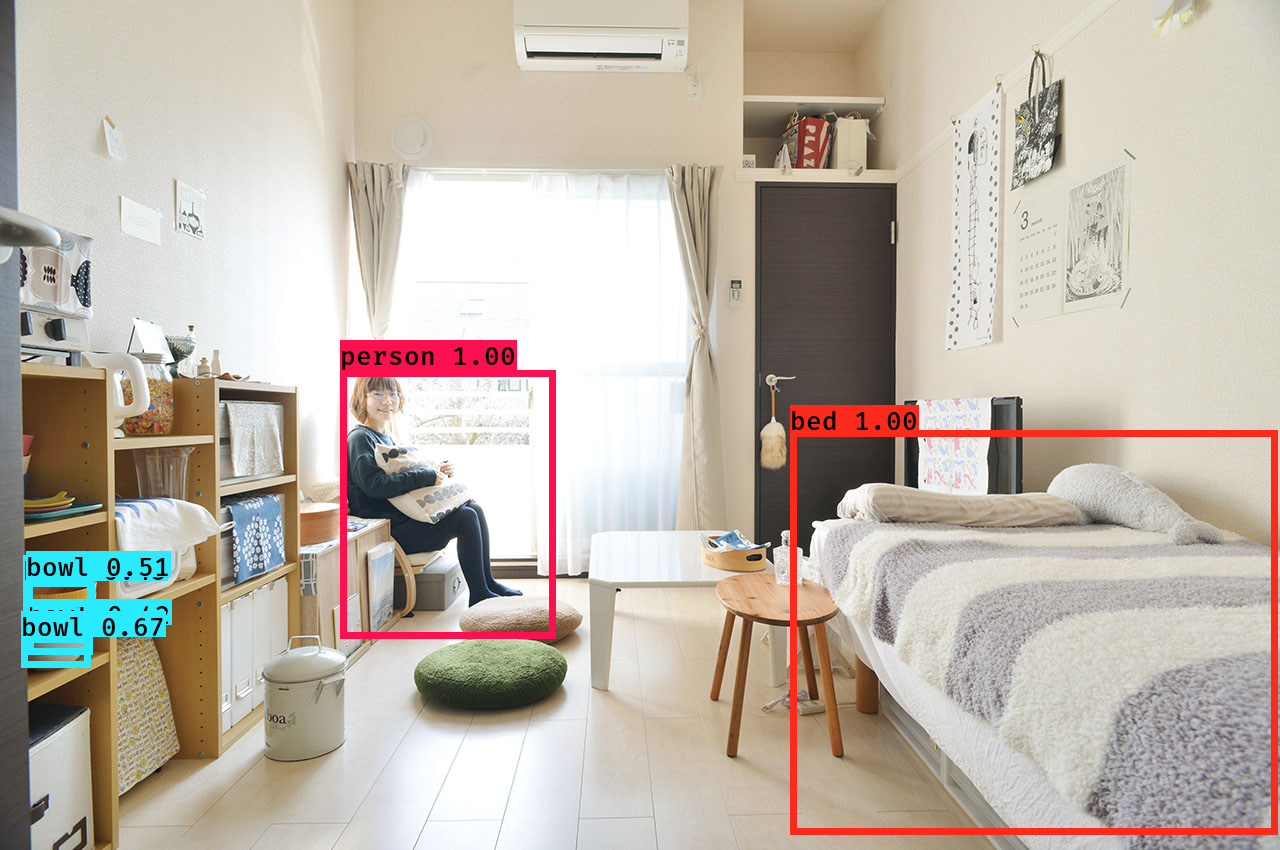

## 【問題4】学習のためのファイルを作成
新しいデータ（シンプソンズデータセット）を学習します。README.mdのTrainingを読み、シンプソンズデータセットを学習するために必要なファイルを作成してください。
アノテーションファイルの形式がSprint18で扱った実装のものとは異なっているので、変換する必要があります。

In [0]:
#annotationファイルのコピー
!cp /content/ObjectDetection-master/annotation.txt .
!mv annotation.txt train.txt 

In [0]:
#annotationファイルのフォーマットを直す
!sed -i 's/jpg,/jpg /' train.txt
!sed -i "s/simpsons_dataset/\/content\/simpsons_dataset/" train.txt

In [0]:
#クラス名のリストを作る
!sed -e 's/.*,//g' train.txt > train_list.txt

In [0]:
#クラス名の重複を消してリストとして保存
!uniq train_list.txt train_classes.txt

In [0]:
#クラス名のファイルをmodel_dataに移動
!mv /content/keras-yolo3-master/train_classes.txt /content/keras-yolo3-master/model_data

In [212]:
!cat  /content/keras-yolo3-master/model_data/train_classes.txt

abraham_grampa_simpson
apu_nahasapeemapetilon
bart_simpson
charles_montgomery_burns
chief_wiggum
comic_book_guy
edna_krabappel
homer_simpson
kent_brockman
krusty_the_clown
lisa_simpson
marge_simpson
milhouse_van_houten
moe_szyslak
ned_flanders
nelson_muntz
principal_skinner
sideshow_bob
ned_flanders
moe_szyslak
principal_skinner
sideshow_bob
ned_flanders
lisa_simpson
charles_montgomery_burns
principal_skinner
charles_montgomery_burns
apu_nahasapeemapetilon
principal_skinner
comic_book_guy
kent_brockman
krusty_the_clown
edna_krabappel
milhouse_van_houten
moe_szyslak
chief_wiggum
nelson_muntz
sideshow_bob
homer_simpson
lisa_simpson
abraham_grampa_simpson
bart_simpson
marge_simpson
ned_flanders
principal_skinner
krusty_the_clown
moe_szyslak


In [0]:
#フォルダ名を連番の数字に置き換える
!ls -1 /content/simpsons_dataset | awk '{printf "sed -i \"s/,%s/,%s/\" train.txt\n", $1, NR}' | sh

In [2]:
#確認
!cat train.txt

In [ ]:
%run convert.py -w yolov3.cfg yolov3.weights model_data/yolo_weights.h5

In [219]:
#クラス名の参照先とepoch数を変更

%%writefile /content/keras-yolo3-master/train.py
"""
Retrain the YOLO model for your own dataset.
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = 'train.txt'
    log_dir = 'logs/000/'
    
    

    #classes_path = 'model_data/voc_classes.txt'
    classes_path = 'model_data/train_classes.txt'
        
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo_weights.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.1
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                #epochs=50,
                epochs=10,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 32 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo_weights.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

Overwriting /content/keras-yolo3-master/train.py


## 【問題5】学習
問題2で作成したファイルを使用して学習してください。実行環境で学習に時間がかかる場合は、学習が行えることを確認するのみで終えて構いません。

In [221]:
#回ることだけ確認した
%run train.py 

Create YOLOv3 model with 9 anchors and 47 classes.
Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.
Train on 7101 samples, val on 788 samples, with batch size 32.
Epoch 1/10
 10/221 [>.............................] - ETA: 11:23 - loss: 6511.4643

KeyboardInterrupt: ignored

## 【問題6】（アドバンス課題）論文と実装の対応
コードリーディングを行ってください。

まず、YOLOv3[2]の論文において重要だと考えた部分を列挙してください。そして、それに対応するコードを見つけてください。

・k-meansで適切なグリッドサイズを決めている
・2層前までの層から特徴量をUpsamplingしている
・YOLOv2よりもCNNの層が厚い
・活性化関数としてsoftmaxでなく、sigmoidが用いられている
（精度としてはあまり落ちないから?（Softmaxだとどれか一つに必ず分類されてしまう）、軽いから?）

R-CNNなどでは、候補領域提案→物体検出の際に分類問題として検出が行われているが、YOLOやSSDでは回帰で検出が行われている。